In [71]:
%matplotlib inline

from __future__ import print_function
import numpy as np
import pandas as pd
import glob
import os

from matplotlib import pyplot as plt
plt.style.use('seaborn-white')

import seaborn as sns

In [80]:
# mags = ['5x_FOV', '10x_FOV', '20x_FOV', '5x', '10x', '20x']
mags = ['20x_FOV', '20x', '10x_FOV', '10x', '5x_FOV', '5x' ]
# models = ['densenet', 'densenet_small', 'fcn8s', 'fcn8s_small', 'unet', 'unet_small']
models = ['densenet_small']
perf_files = []
labels = []
for mag in mags:
    for model in models:
        mx = '../{}/{}/inference/processed_perf.csv'.format(model, mag)
        
        
        if os.path.exists(mx):
            perf_files.append(mx)
#             labels.append('{}_{}'.format(model, mag))
            labels.append('{}'.format(mag.replace('_', '-')))
        else:
            print(mx)
        

In [81]:
_ = [print(px) for px in perf_files]

../densenet_small/20x_FOV/inference/processed_perf.csv
../densenet_small/20x/inference/processed_perf.csv
../densenet_small/10x_FOV/inference/processed_perf.csv
../densenet_small/10x/inference/processed_perf.csv
../densenet_small/5x_FOV/inference/processed_perf.csv
../densenet_small/5x/inference/processed_perf.csv


In [101]:
perf_files = [
    '../tfhub/inference/mobilenet_v2_050_224/processed_perf.csv',
    '../tfhub/inference/inception_v3/processed_perf.csv',
    '../tfhub/inference/nasnet_large/processed_perf.csv',
    '../tfhub/inference/resnet_v2_152/processed_perf.csv',
]

labels = [
    'MobileNet',
    'Inception-V3',
    'NASNet',
    'ResNet-152',
]

In [98]:
f1_scores = []
means = []
medians = []
for px in perf_files:
    print(px)
    pdf = pd.read_csv(px, sep='\t', index_col=0)
    try:
        ep_f1 = pdf['EpitheliumF1'].values
    except:
        pdf = pd.read_csv(px, sep=',', index_col=0)
        ep_f1 = pdf['EpitheliumF1'].values
        
    means.append(ep_f1.mean())
    medians.append(np.median(ep_f1))
    f1_scores.append(ep_f1)

../tfhub/inference/mobilenet_v2_050_224/processed_perf.csv
../tfhub/inference/inception_v3/processed_perf.csv
../tfhub/inference/nasnet_large/processed_perf.csv
../tfhub/inference/resnet_v2_152/processed_perf.csv


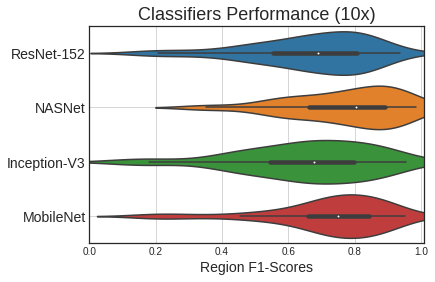

In [103]:
# _ = plt.boxplot(f1_scores[::-1], vert=0, labels=labels[::-1])
_ = sns.violinplot(data=f1_scores[::-1], orient='h', width=0.8, scale='width')
plt.title('Classifiers Performance (10x)', fontsize=18)

# plt.yticks(fontsize=14)
plt.yticks(np.arange(4), labels[::-1], fontsize=14)

plt.xlabel('Region F1-Scores', fontsize=14)
plt.xlim([0., 1.01])
plt.grid()